In [3]:
#Importing data using pd function 
import pandas as pd
df = pd.read_csv("C:\\Users\\moham\\Desktop\\glass.csv")
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [5]:
# apply above index name as id and properties

df.index.name = 'id'
df = df.rename(columns={df.columns[0]: 'Data'})
df


,Data
id,
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium


In [7]:
# prompt: Label encode

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Data'] = le.fit_transform(df['Data'])
df

,Data
id,
0,10
1,15
2,14
3,13
4,7
5,16
6,12
7,9
8,8


Data    0
dtype: int64
            Data
count  18.000000
mean    8.500000
std     5.338539
min     0.000000
25%     4.250000
50%     8.500000
75%    12.750000
max    17.000000


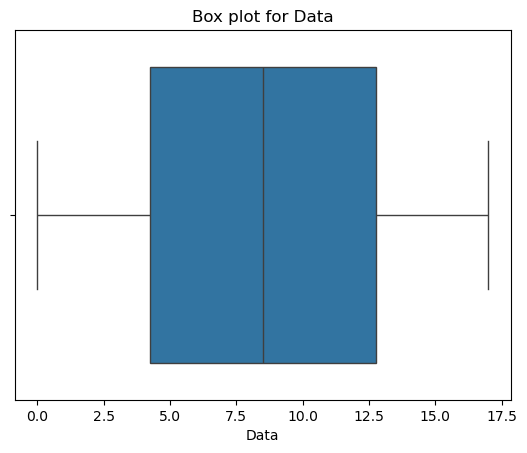

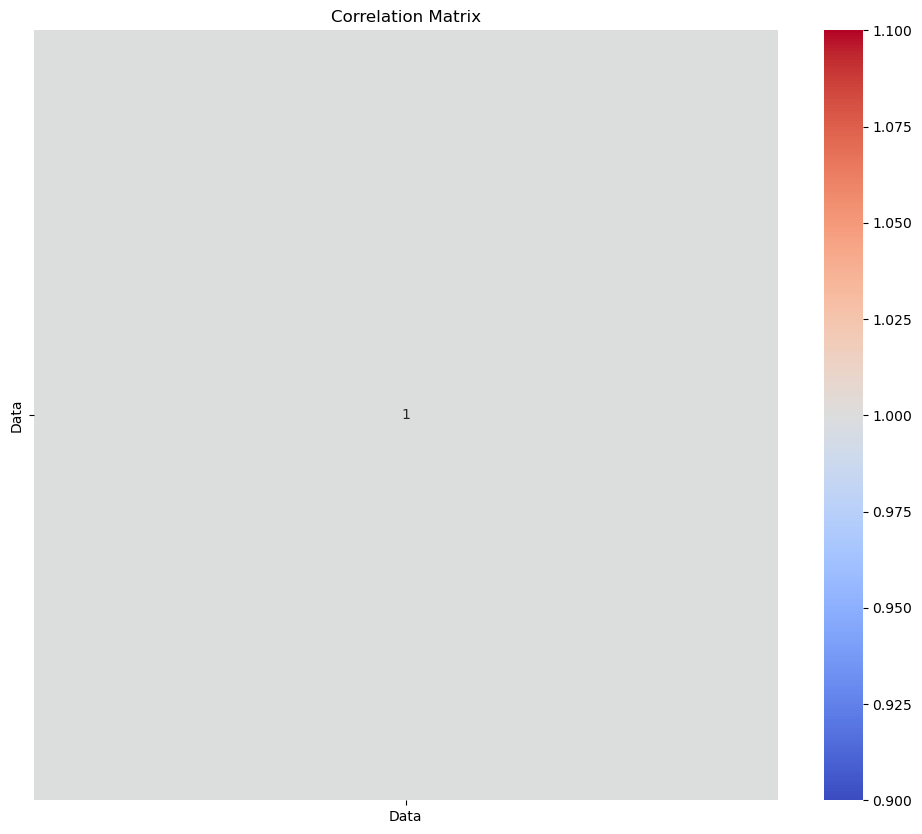

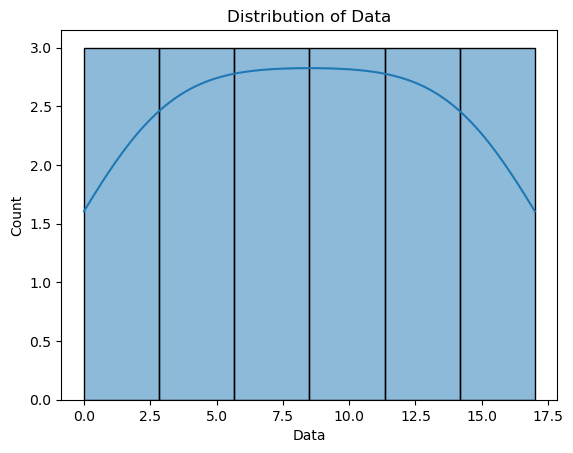

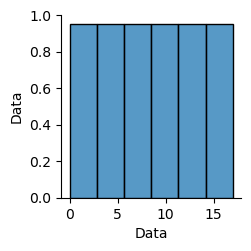

In [9]:
# prompt: Exploratory Data Analysis (EDA):
# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, inconsistencies in the data

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check for outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title(f"Box plot for {column}")
  plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of variables
for column in df.columns:
  plt.figure()
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.show()
#==================================================================
#Data visualization
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()


In [11]:
#Data preprocessing
#  Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

# Check for missing values (already done in the preceding code)
print(df.isnull().sum())

# In this case, there are no missing values. 
# If there were missing values, we could consider the following strategies:

# 1. Removal: 
#    - If only a small portion of the data has missing values, we might remove those rows or columns.
#    - This is a suitable option when missing values are randomly distributed and not substantial.
#    - Example:

Data    0
dtype: int64


In [29]:
# Random Forest Model Implementation
# 1. Divide the data into train and test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [31]:
#4: Random Forest Model Implementation
# Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

In [19]:
# 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

# We've already trained the model and evaluated it in the preceding code. 
# Here's a summary of the process:

# 1. Split the data into training and testing sets:
#    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Train the Random Forest classifier:
#    rf_classifier.fit(X_train, y_train)

# 3. Make predictions on the test set:
#    y_pred = rf_classifier.predict(X_test)

# 4. Evaluate the model:
#    accuracy = accuracy_score(y_test, y_pred)
#    print("Accuracy:", accuracy)
#    print(classification_report(y_test, y_pred))

# The code already prints the accuracy, precision, recall, and F1-score for the test data. 


In [35]:
#: Bagging and Boosting Methods
# Apply mthe Bagging and Boosting methods and compare the results.

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Bagging
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42) # use estimator instead of base_estimator
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)
print(classification_report(y_test, y_pred_bagging))

# Boosting (AdaBoost)
boosting_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Boosting Accuracy:", accuracy_boosting)
print(classification_report(y_test, y_pred_boosting))

# Compare the results
print("\nComparison of Results:")
print("Random Forest Accuracy:", accuracy)
print("Bagging Accuracy:", accuracy_bagging)
print("Boosting Accuracy:", accuracy_boosting)

Bagging Accuracy: 0.0
              precision    recall  f1-score   support

           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

Boosting Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0


Comparison of Results:
Random Forest Accuracy: 0.0
Bagging Accuracy: 0.0
Boosting Accuracy: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea